In [1]:
###########导入库###########
import cv2                                  #导入cv2库
import numpy as np                          #导入numpy库

In [2]:
'''
创建空白窗口，通过空格键退出界面
'''

cv2.namedWindow('window',cv2.WINDOW_NORMAL) #创建新窗口，命名为window
cv2.resizeWindow('window',800,600)          #调整窗口大小
cv2.imshow('window',0)                      #在窗口中显示内容，0表示不显示任何内容

while 1:
    key = cv2.waitKey(0)                    #等待键入
    if key == ord(' '):                     #ord表示取其ASCII码值
        cv2.destroyAllWindows()             #关闭窗口
        break                               #可跳出while循环

'''
更好的按任意键退出的写法：
cv2.waitKey(0)                              #等待输入（没输入就一直等）
cv2.destroyAllWindows()                     #关闭窗口
'''

'\n更好的按任意键退出的写法：\ncv2.waitKey(0)                              #等待输入（没输入就一直等）\ncv2.destroyAllWindows()                     #关闭窗口\n'

In [3]:
'''
读取图片并显示，通过空格键退出
'''

img = cv2.imread('./try.png')               #读取图片到img变量中
cv2.imshow('img',img)
key = cv2.waitKey(0)                        #等待键入
if key == ord(' '):
    print('ready to destroy')
    cv2.destroyAllWindows()                 #关闭窗口

ready to destroy


In [4]:
'''
创建窗口，画矩形和圆形
'''

img = np.zeros((480,640,3),np.uint8)
cv2.rectangle(img,(10,100,),(200,220),(0,255,0),5)
cv2.circle(img,(100,300),45,(0,255,0),4,40)
cv2.circle(img,(300,200),35,(0,255,0),4,16)
cv2.circle(img,(300,300),25,(0,255,0),4,12)
cv2.circle(img,(300,300),15,(0,255,0),4,8)
cv2.circle(img,center=(100,100),radius=20,color=(0,0,255))
cv2.imshow("draw",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
'''
创建空白图，画椭圆
'''

img = np.zeros((480,640,3),np.uint8)
cv2.ellipse(img,(100,100),(45,25),0,0,360,(0,255,0),5)
cv2.ellipse(img,(200,200),(80,30),0,0,90,(0,255,0),5)
cv2.imshow("draw",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
'''
用putText显示英文文本
'''

img = np.zeros((480,640,3),np.uint8)
cv2.putText(img,'Hello world!',(10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1,(0,255,0),0)
cv2.putText(img,'Hello world!',(10,100),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,2,(0,255,0),3)
cv2.putText(img,'Hello world!',(10,150),cv2.FONT_HERSHEY_COMPLEX,       2,(0,255,0),3)
cv2.putText(img,'Hello world!',(10,200),cv2.FONT_HERSHEY_DUPLEX,        2,(0,255,0),3)
cv2.putText(img,'Hello world!',(10,250),cv2.FONT_HERSHEY_PLAIN,         2,(0,255,0),3)
cv2.putText(img,'Hello world!',(10,300),cv2.FONT_ITALIC,                2,(0,255,0),3)

cv2.imshow("draw",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
'''用Pillow包显示中文文本'''
from PIL import ImageFont,ImageDraw,Image

#创建纯白背景
img = np.full((400,400,3),fill_value=255,dtype=np.uint8)

#导入字体文件，字体文件从Windows/Fonts中拷贝
Font = ImageFont.truetype('./HGXK_CNKI.TTF',35)

#创建Pillow图片
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil)

#利用draw绘制中文
draw.text((80,30),'你好，世界！',font=Font,fill=(255,255,0,0))

#重返nparry
img= np.array(img_pil)

#显示
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
#读取图片   以灰度读取
img = cv2.imread('.\Desktop_Background.jpg',cv2.IMREAD_GRAYSCALE)
img= cv2.resize(img, (int(img.shape[1]/4), int(img.shape[0]/4)))
cv2.imwrite('gray.jpg',img)
cv2.imshow('background',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
'''操作摄像头，用摄像头捕获画面'''

cam = cv2.VideoCapture(0)    #打开摄像头
ret,frame = cam.read()       #捕获画面，参数传给两个变量
cam.release()                #关闭摄像头

cv2.imshow('img',frame)      #显示捕获的画面
cv2.imwrite('Wong.jpg',frame)#保存捕获的画面

cv2.waitKey()
cv2.destroyAllWindows()


In [15]:
'''操作摄像头，显示摄像头实时画面'''

cam = cv2.VideoCapture(0)

while (cv2.waitKey(1000//120)!=ord('q')):
    ret,frame = cam.read()
    cv2.imshow('cam',frame)
cam.release()
cv2.destroyAllWindows()

In [16]:
'''通过摄像头找到人脸'''

face_detector = cv2.CascadeClassifier('.\haarcascade_frontalface_alt.xml')  #use the tool

cam = cv2.VideoCapture(0)                                                   #open the camera

while (cv2.waitKey(1000//24)!=ord('q')):
    ret,frame = cam.read()                                                  #读摄像头画面（1帧）
    grayinfo = cv2.cvtColor(frame,code = cv2.COLOR_BGR2GRAY)                #彩图 转 灰度图
    faceinfo = face_detector.detectMultiScale(grayinfo)                     #从 灰度图 获取 人脸信息
    cv2.putText(frame,str(faceinfo),(5,15),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255),0)
    for x,y,w,h in faceinfo:
        cv2.rectangle(frame,(x,y,),(x+w,y+h),(0,0,255),2)
    cv2.imshow('cam',frame)                                                 #显示画面
cam.release()
cv2.destroyAllWindows()



In [26]:
'''对图片马赛克的3种方式'''

import cv2
import numpy as np

img = cv2.imread('Desktop_Background.jpg')

'''1'''
# img2 = cv2.resize(img,(236,146))      #将图片缩小
# img3 = cv2.resize(img2,(1086,674))    #再放大图片
# cv2.imshow('desktop',img3)            #显示图片

'''2'''
# img2 = cv2.resize(img,(118,73))       #缩小图片
# img3 = np.repeat(img2,10,axis=0)      #纵向重复像素
# img4 = np.repeat(img3,10,axis=1)      #横向重复像素
# cv2.imshow('desktop',img4)            #显示图片

'''3'''
img2 = img[::10,::10]                   #将图片信息当做数组，每隔10个取一个数据
cv2.namedWindow('desktop',
                flags=cv2.WINDOW_NORMAL)#将图片放入窗口中
cv2.resizeWindow('desktop',1086,674)    #调整窗口大小（实际上也调整了图片大小）
cv2.imshow('desktop',img2)              #显示图片


cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
'''将图片中特定部分马赛克'''

img = cv2.imread('Desktop_Background.jpg')  #读取图片
img = cv2.resize(img,(1086,674))            #调整图片大小
cup = img[150:650,670:990]                  #将图片当成数组，切片出‘杯子’的区域
cup = cup[::10,::10,]                       #将杯子区域每隔10个点取一个数据
cup = cv2.resize(cup,(320,500))             #将被取数据放大
img[150:650,670:990] = cup                  #将原图片中杯子区域替换成处理过后的马赛克杯子

cv2.imshow('desktop',img)                   #显示
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
'''识别人脸并加上马赛克'''

import cv2
import numpy as np

img = cv2.imread('fake_face.jpg')       #读图片
img = cv2.resize(img,(512,512))         #缩小图片
# img = cv2.cvtColor(img,code=cv2.COLOR_RGB2GRAY)
iptool = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
                                        #导入特征值
faceinfo = iptool.detectMultiScale(img) #识别图片中的人脸 返回数组

for x,y,w,h in faceinfo:                #遍历读出数据
    cv2.rectangle(                      #根据数据用矩形框出人脸
        img,pt1=(x,y),
        pt2=(x+w,y+h),
        color=[0,0,255],
        thickness=1)

cv2.imshow('fake_face.jpg',img)         #显示图片
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
'''抠图'''
import cv2
import numpy as np

wjx = cv2.imread('./wjx.jpg')
wjx = cv2.resize(wjx,(100,100))
desktop = cv2.imread('./Desktop_Background.jpg')
desktop = cv2.resize(desktop,(1181,733))
w = wjx.shape[1]
h = wjx.shape[0]

for i in range(w):
    for j in range(h):
        if not (wjx[i,j] > 200).all():
            desktop[i+400,j+550] = wjx[i,j]
cv2.imshow('desktop',desktop)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
'''人脸贴纸画条件赋值'''
import cv2
import numpy as np

img = cv2.imread('./ys.png')
gray = cv2.cvtColor(img,code=cv2.COLOR_RGB2GRAY)
fd = cv2.CascadeClassifier('./haarcascade_frontalface_alt.xml')
faces = fd.detectMultiScale(gray)

head = cv2.imread('./head.png')

for x,y,w,h in faces:
    head = cv2.resize(head,(w,h))
    for i in range(h):
        for j in range(w):
            if not (head[i,j]>240).all():
                img[i+y,j+x] = head[i,j]
cv2.imshow('nba',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
'''高斯模糊+边缘检测'''
'''2022年7月4日15:24'''


import cv2
import numpy as np


img = cv2.imread('./head.png')
img = cv2.resize(img,[450,450])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
GB = cv2.GaussianBlur(gray,(5,5),1)     #高斯模糊
canny = cv2.Canny(GB,75,200)            #边缘检测

cv2.imshow('head',img)
cv2.imshow('gb',GB)
cv2.imshow('canny',canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
'''另一方法找图片轮廓'''
'''2022年7月4日15:31'''
'''2022年7月6日'''

import cv2
import numpy as np

'''''''导入人脸图片并处理'''''''
ren = cv2.imread('fake_face.jpg')#导入图片
ren = cv2.resize(ren,[512,512])#调整大小
ren_gray = cv2.cvtColor(ren,code = cv2.COLOR_BGR2GRAY)#转灰度图，方便人脸识别

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')#引入人脸识别
faces = face_detector.detectMultiScale(ren_gray)#识别人脸

'''''''导入贴图原图并处理'''''''
head = cv2.imread('head.png')#导入图片
head_gray = cv2.cvtColor(head,code=cv2.COLOR_BGR2GRAY)#转灰度图，方便边界检测

thh,head_bin = cv2.threshold(head_gray,100,255,type=cv2.THRESH_OTSU)#返回的thh是用于划分二值的阈值，head_bin是二值图片
contours,hierarchy = cv2.findContours(head_bin,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)#在二值图片中识别所有轮廓

'''''''根据面积选择轮廓'''''''
areas = []                                  #创建一个列表
for contour in contours:                    #遍历所有的轮廓
    areas.append(cv2.contourArea(contour))  #将所有轮廓放入列表中
areas = np.asanyarray(areas)                #将列表转换成数组
index = areas.argsort()     #从小到大排序
mask = np.zeros_like(head_gray,dtype=np.uint8)#以head_gray的大小为尺寸，创建mask
cv2.drawContours(mask,contours,index[-2],(255,255,255),thickness=-1)#在mask中绘制轮廓

for x,y,w,h in faces:
    mask2 = cv2.resize(mask,[w,h])#调整mask大小
    head = cv2.resize(head,[w,h])#调整原head图大小
    for i in range(h):
        for j in range(w):
            if (mask2[i,j] == 255).all():
                ren[i+y,j+x] = head[i,j]

cv2.imshow('output',ren)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [90]:
'''人脸轮廓替换 通过位运算'''
'''2022-7-7 15:24:14'''


import cv2
import numpy as np

'''''''导入人脸图片并处理'''''''
ren = cv2.imread('fake_face.jpg')#导入图片
ren = cv2.resize(ren,[512,512])#调整大小
ren_gray = cv2.cvtColor(ren,code = cv2.COLOR_BGR2GRAY)#转灰度图，方便人脸识别

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')#引入人脸识别
faces = face_detector.detectMultiScale(ren_gray)#识别人脸

'''''''导入贴图原图并处理'''''''
head = cv2.imread('head.png')#导入图片
head_gray = cv2.cvtColor(head,code=cv2.COLOR_BGR2GRAY)#转灰度图，方便边界检测

thh,head_bin = cv2.threshold(head_gray,100,255,type=cv2.THRESH_OTSU)#返回的thh是用于划分二值的阈值，head_bin是二值图片
contours,hierarchy = cv2.findContours(head_bin,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)#在二值图片中识别所有轮廓

'''''''根据面积选择轮廓'''''''
areas = []                                  #创建一个列表
for contour in contours:                    #遍历所有的轮廓
    areas.append(cv2.contourArea(contour))  #将所有轮廓放入列表中
areas = np.asanyarray(areas)                #将列表转换成数组
index = areas.argsort()                     #从小到大排序
mask = np.zeros_like(head,dtype=np.uint8)#以head_gray的大小为尺寸，创建mask
cv2.drawContours(mask,contours,index[-2],(255,255,255),thickness=-1)#在mask中绘制轮廓

for x,y,w,h in faces:
    face = ren[y:y+h,x:x+w]
    mask = cv2.resize(mask,[w,h])#调整mask大小
    head = cv2.resize(head,[w,h])#调整原head图大小
    
    head2 = cv2.bitwise_and(head,mask)
    mask = cv2.bitwise_not(mask,mask)
    face = cv2.bitwise_and(face,mask)
    head = cv2.bitwise_or(head2,face)
    
    ren[y:y+h,x:x+w] = head

cv2.imshow('output',ren)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
'''直方图均化处理'''
'''2022-7-10 08:05:04'''

import numpy as np
import matplotlib.pyplot as plt
import cv2  #opencv未提供案例图片
from skimage import data

moon = data.moon()
# plt.hist(moon.ravel(),bins=256)
# plt.show()

# moon2 = cv2.equalizeHist(moon)  #直方图均衡化
# plt.hist(moon2.reshape(-1),bins=256)
# plt.show()

hist = cv2.calcHist([moon],[0],None,[256],[0,256])
print(hist)
print(hist.shape)
plt.plot(hist)
plt.show()

cv2.imshow('moon',moon)
# cv2.imshow('moon2',moon2)
cv2.waitKey(0)
cv2.destroyAllWindows()

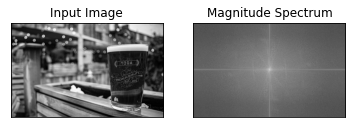

In [7]:
'''图象傅里叶变换'''
'''2022-7-10 09:00:13'''

import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('gray.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# 这里构建振幅图的公式没学过
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
